# Melanoma Classification Model - MLP


## Set up

#### Set up for importing utilities

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
os.environ["TF_GPU_ALLOCATOR"]="cuda_malloc_async"

 #### Random State
 Please use the following random state for all methods that may take a random state in order to achieve reproducable results

In [2]:
from utilities import random_state
random_state = random_state() 

#### Export Config
You may configure 
- whether the results shall be exported (export_results)
- where the results will be exported to

The default folder "export" will not be tracked by git in order to avoid flooding the repository with w.i.p. results. If you want to save a result on github, please rename it including the type of model and the date and move the picture to another folder :)

In [3]:
export_results = True
export_folder = 'export'

date_format = "%d%m%Y%H%M%S" # timestamp format in exported files
if export_results:
    import datetime
    import os
    if not os.path.exists(export_folder): 
      os.makedirs(export_folder)
      print("Created new directory %s" %export_folder)

#### Timer

Start the timer

In [4]:
import time
start = time.time()

## Get data

#### Get image paths
You may adjust the number of images loaded in order to run models more quickly on your private computer. Note hoewever that the less images you use the worse the predictions will likely be. 

For developing models on the cluster the max_images parameter should be removed. Instead call the method get_all_img_paths(img_folder).

In [3]:
base_path = "data/30" 
downsampled_data = True
img_pixel = 200

In [4]:
from utilities import get_all_img_paths, get_img_paths



img_folder_train = base_path + "/train" + ("_downsampled" if downsampled_data else "")
img_folder_test = base_path + "/test" + ("_downsampled" if downsampled_data else "")
max_images_train = 800
max_images_test = 100

img_paths_train = get_img_paths(img_folder_train, max_images_train) 
img_paths_test = get_img_paths(img_folder_test, max_images_test)

#### Load data
Loads the images specified in img_paths into a data frame. This includes resizing the images and flattening them into an array and may take a while.

In [5]:
from utilities import load_train_test

groundtruth_file_train = base_path + "/ISIC_2020_2019_train" + ("_downsampled" if downsampled_data else "") + ".csv" 
groundtruth_file_test = base_path + "/ISIC_2020_2019_test" + ("_downsampled" if downsampled_data else "") + ".csv"
# available options
options = ["sequential", # first load train, then load test
           "parallel_train_test", # load train and test parallel (load data within train and test sequential)
           "sequential_train_test_parallel_chunks", # load first train, then test, but load the data within the sets parallel
           "parallel_fusion" # run train and test parallel and parallely load data with train and test 
          ]

# chose an option
option = "parallel_fusion"

df_train, df_test = load_train_test(img_paths_train, groundtruth_file_train, img_paths_test, groundtruth_file_test, option,img_pixel);

Num images per thread 42
start loading train
start loading test
start thread #0 for train
start thread #1 for train
start thread #0 for test
start thread #2 for trainstart thread #1 for test

start thread #3 for train
start thread #4 for train
start thread #5 for train
start thread #6 for train
start thread #7 for train
start thread #8 for train
start thread #9 for train
start thread #10 for train
start thread #11 for train
start thread #12 for train
start thread #13 for train
start thread #14 for train
start thread #15 for train
start thread #16 for train
start thread #17 for train
start thread #18 for train
finished thread #18 for train
finished thread #10 for train
finished thread #4 for train
finished thread #8 for train
finished thread #17 for train
finished thread #15 for train
finished thread #3 for train
finished thread #1 for train
finished thread #2 for train
finished thread #0 for train
finished thread #12 for train
finished thread #11 for train
finished thread #7 for train


#### Split into target and predictors

In [6]:
from utilities import split_predictors_target

X_train, y_train = split_predictors_target(df_train) 
X_test, y_test = split_predictors_target(df_test) 

In [7]:
from utilities import unflatten_images_df

X_train_flat = X_train
print('done6')
X_test_flat = X_test
print('done7')
X_train = unflatten_images_df(X_train, img_pixel=img_pixel)
print('done8')
X_test = unflatten_images_df(X_test, img_pixel=img_pixel)

done6
done7
done8


## Train model
Put your model here! 

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.layers import Cropping2D

model = models.Sequential()
model.add(layers.Conv2D(32, (10, 10), activation='sigmoid', input_shape=(img_pixel,img_pixel,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 191, 191, 32)      9632      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 95, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
Total params: 65,056
Trainable params: 65,056
Non-traina

2022-11-16 09:33:02.914461: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 09:33:03.053028: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 09:33:03.053189: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 09:33:03.053320: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so retur

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 191, 191, 32)      9632      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 95, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 123904)            0

In [14]:
model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test), batch_size=200)

Epoch 1/10


/opt/anaconda-2022.05/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 1s 220ms/step - loss: nan - accuracy: 0.7100 - val_loss: nan - val_accuracy: 0.9000
Epoch 2/10
4/4 [==============================] - 1s 179ms/step - loss: nan - accuracy: 0.7100 - val_loss: nan - val_accuracy: 0.9000
Epoch 3/10
4/4 [==============================] - 1s 180ms/step - loss: nan - accuracy: 0.7100 - val_loss: nan - val_accuracy: 0.9000
Epoch 4/10
4/4 [==============================] - 1s 180ms/step - loss: nan - accuracy: 0.7100 - val_loss: nan - val_accuracy: 0.9000
Epoch 5/10
4/4 [==============================] - 1s 179ms/step - loss: nan - accuracy: 0.7100 - val_loss: nan - val_accuracy: 0.9000
Epoch 6/10
4/4 [==============================] - 1s 177ms/step - loss: nan - accuracy: 0.7100 - val_loss: nan - val_accuracy: 0.9000
Epoch 7/10
4/4 [==============================] - 1s 177ms/step - loss: nan - accuracy: 0.7100 - val_loss: nan - val_accuracy: 0.9000
Epoch 8/10
4/4 [==============================] - 1s 178ms/step - loss: n

#### Timer 
Stop the timer

In [53]:
stop = time.time()
print(f'It took {stop - start} s to load the data and train the model')

if export_results:
    f = open(f'{export_folder}/overall_time.txt', 'w')
    f.write(f'Time it took : {stop - start} s')
    f.close()

## Test model

#### Predict test set
You may need to modify this depending on your model. Important thing is that after this step, the results of your classification should be stored in y_pred so that the following steps will work!

In [15]:
y_pred_continuous = model.predict(X_test)

y_pred_discrete = (model.predict(X_test) > 0.5).astype("int32")
y_pred = y_pred_discrete


#### Print report

In [17]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, digits=4)
print(f'\nClassification_report=\n{report}')

# if export_results:
#     file = open(export_folder + "/classification_report_"+datetime.datetime.now().strftime(date_format)+".txt", 'w')
#     file.write(report)
#     file.close()


Classification_report=
              precision    recall  f1-score   support

           0     0.9000    1.0000    0.9474        90
           1     0.0000    0.0000    0.0000        10

    accuracy                         0.9000       100
   macro avg     0.4500    0.5000    0.4737       100
weighted avg     0.8100    0.9000    0.8526       100



/opt/anaconda-2022.05/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda-2022.05/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda-2022.05/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'y_test' is not defined

#### Confusion Matrix

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = ["no melanoma", "melanoma"]

cf = confusion_matrix(y_test, y_pred)
plot = sns.heatmap(cf, annot= True, fmt=".0f",
           xticklabels = class_names,
           yticklabels = class_names)
plot.set(xlabel='Prediction', ylabel='Actual')

if export_results:
    plot.get_figure().savefig(export_folder + '/confusion_matrix_' + datetime.datetime.now().strftime(date_format) + ".png")

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

#### Display images and predictions
Note: you may pass a fourth parameter indicating the maximum images displayed. per default this parameter is set as 50

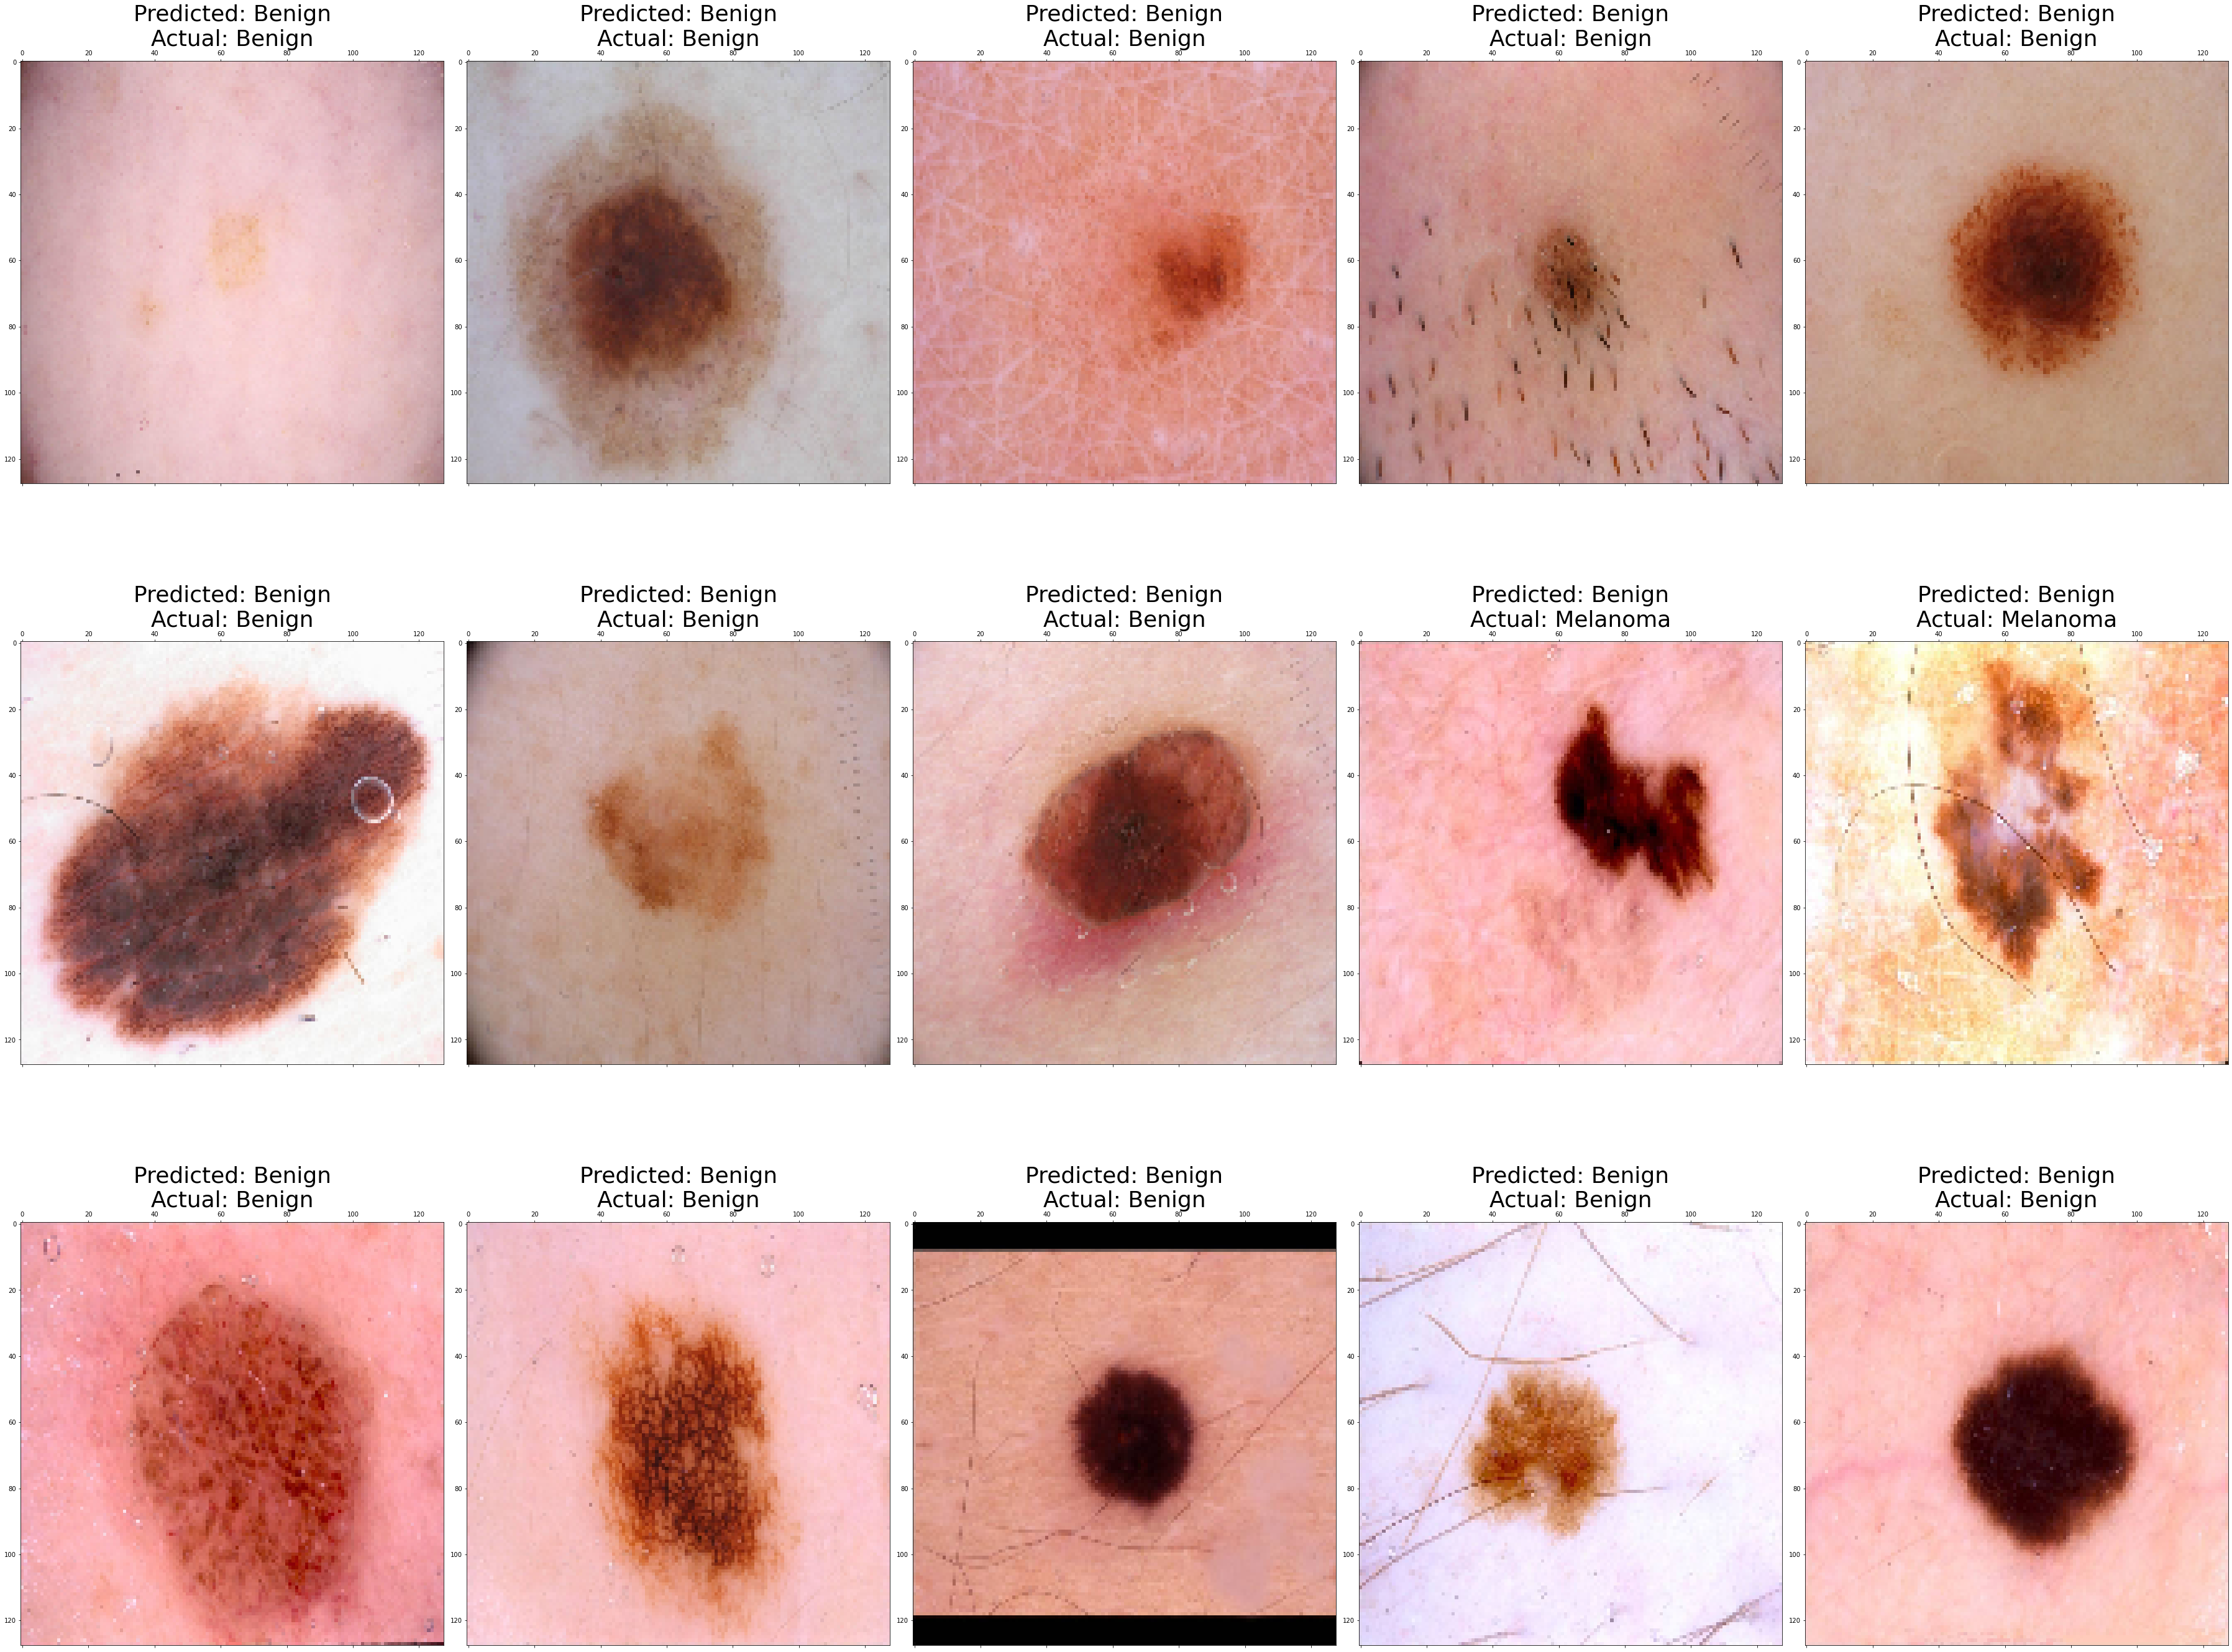

In [13]:
from utilities import display_results

plt_all = display_results(X_test, y_pred, y_test, 15)

if export_results:
    plt_all.savefig(export_folder + "/classification_results_"+datetime.datetime.now().strftime(date_format)+".png")

plt_all.show()

#### Display wrongly classified images
Note: you may pass a fourth parameter indicating the maximum images displayed. per default this parameter is set as 50

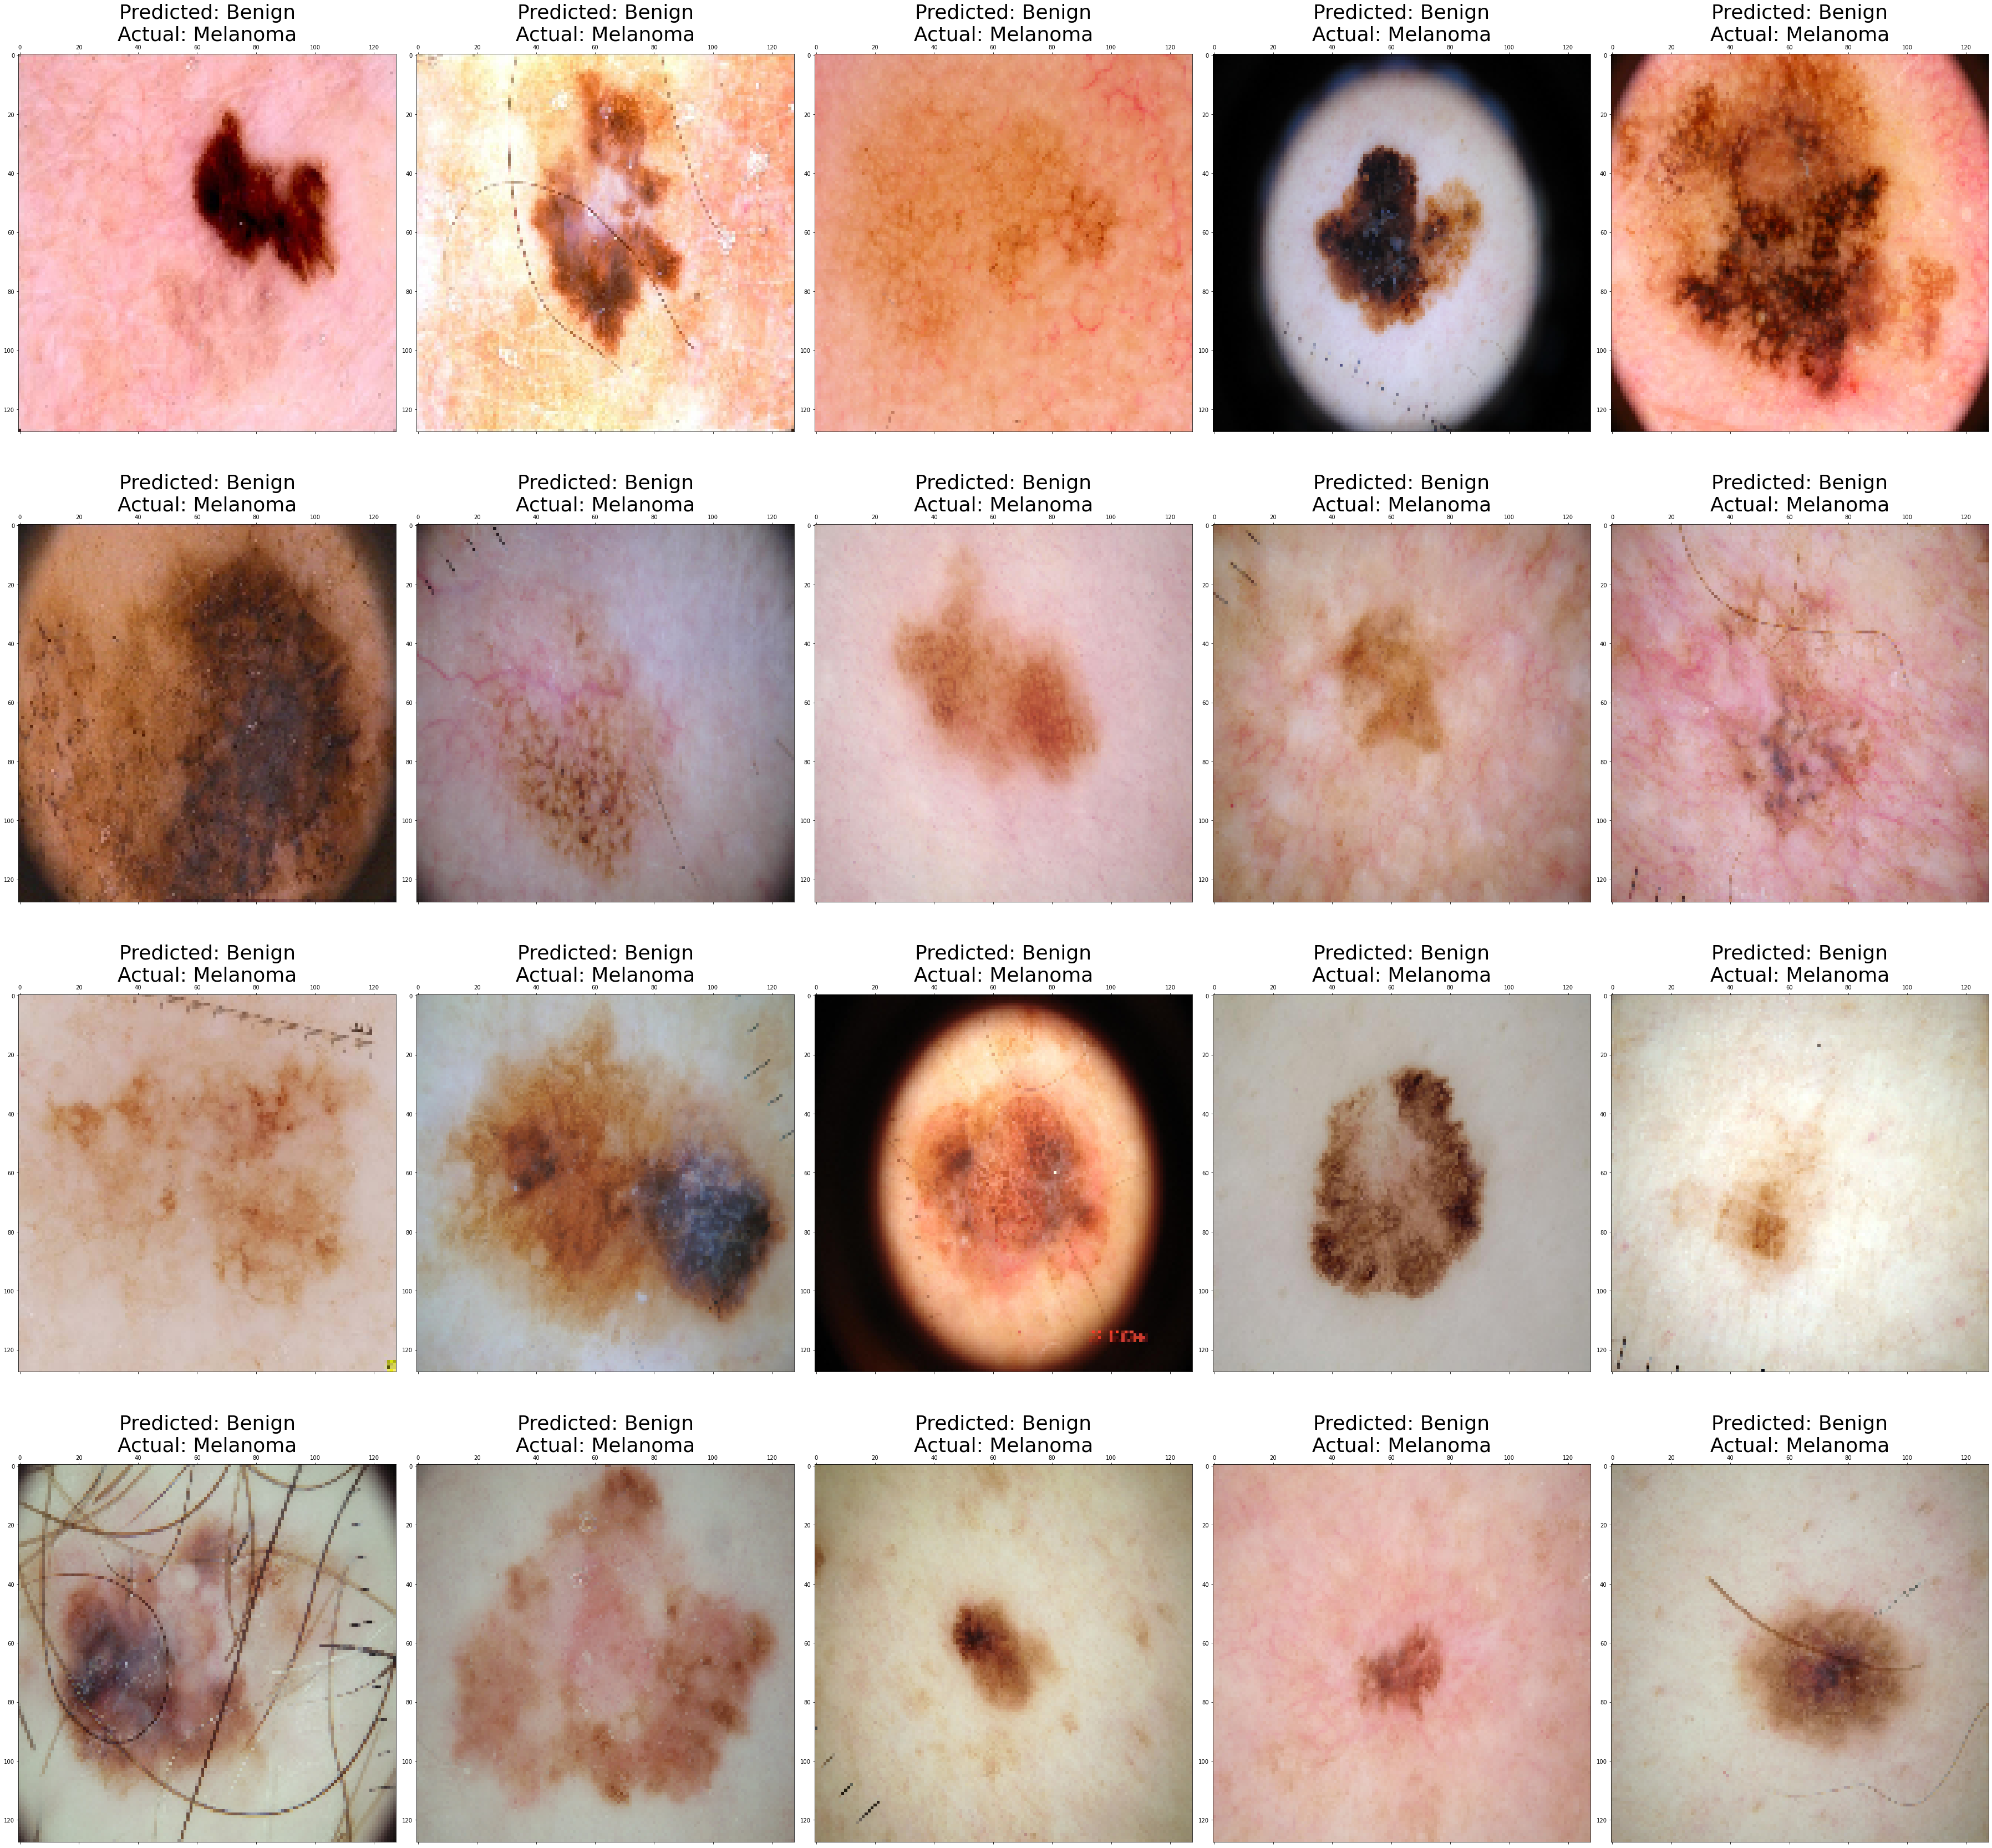

In [14]:
from utilities import display_interesting_results

plt_wrong = display_interesting_results(X_test, y_pred, y_test)

if export_results:
    plt_wrong.savefig(export_folder + "/incorrect_classification_results_"+datetime.datetime.now().strftime(date_format)+".png")
    
plt_wrong.show()